# Computarized tomography

In this notebook we will use the Radon transform to simulate a Computarized Tomography experiment. We will reconstruct the picture of the body (phantom) based on the resulting sinogram formed by the simulation. For the reconstruction we will use the Filtered Back Projection (FBP)

## Exercise 1 (Foward)

Read the Shepp-Logan phantom image and compute the sinogram using the Radon transform.

**Hint**: Use the function `radon` from the `skimage` module.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon


angles = 100
theta = np.linspace(0., 180., angles, endpoint=False)

x_true = plt.imread('phantom.png')[:,:, 0]/255
y_true = radon(x_true, theta=theta, circle=False)
y_delta = y_true + np.random.randn(*y_true.shape) * 0.001

# Show true data vs noisy data
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Ground truth')
plt.imshow(x_true, cmap='gray')

plt.subplot(1,2,2)
plt.title('Noisy data')
plt.imshow(y_delta, extent=(0, 180, 0, y_true.shape[0]), cmap='gray')

## Exercise 2 (Filtered Back-Projection)

Reconstruct the phantom from the sinogram using the Filtered Back-Projection method.

**Hint:** Use the `iradon` function from the `skimage` module.

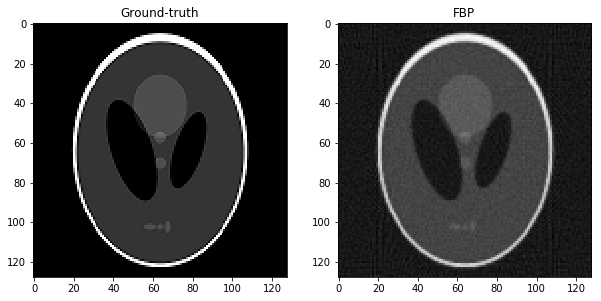

In [2]:
from skimage.transform import iradon

x_bp = iradon(y_delta, theta=theta, circle=False)

fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('Ground-truth')
plt.imshow(x_true, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('FBP')
plt.imshow(x_bp, cmap='gray')

## Exercise 3 (Movie)

If we compute independently for each angle the reconstructions, we get a set of slice images such that if we add them up we get the whole reconstruction. If we do this step by step and show the partial results we get a movie.

In [14]:
from skimage.transform import iradon
import imageio
from skimage import img_as_ubyte
from IPython import display


result = np.zeros(x_true.shape)
    
with imageio.get_writer('radon.gif', mode='I') as writer:
    last = -1
    for th in np.linspace(0., 180., 180, endpoint=False):
        sinogram = radon(x_true, theta=[th], circle=False)
        result += iradon(sinogram, theta=[th], circle=False)
        writer.append_data(img_as_ubyte(result))
    
    for j in range(10):
        writer.append_data(img_as_ubyte(result))

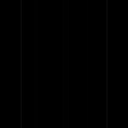

In [15]:
display.Image(filename="radon.gif", width=300, height=300)